Import data

In [1]:
import pandas as pd
file_dataset = 'datasetHoax.csv'
df = pd.read_csv(file_dataset)
df = df.dropna(subset=['narasi'])
df

,narasi,judul,label
0,caler tryout radio talk show recently shared t...,pemakaian masker menyebabkan penyakit legionaires,1
1,ythseluruh angota grup sesuai instruksi gubern...,instruksi gubernur jateng tentang penilangan b...,1
2,jokowi adalah presiden terbaik dalam sejarah b...,foto jim rohn jokowi adalah presiden terbaik d...,1
3,maf mas dan mbak ini bukan politik tapi kenyat...,ini bukan politik tapi kenyatan pak jokowi ber...,1
4,kadrun jika lihat foto ini panas dingin,foto kadrun jika lihat foto ini panas dingin,1
...,...,...,...
9655,foto raja salman mengangkat tandu jenazah korb...,foto raja salman mengangkat tandu jenazah korb...,1
9656,jokowi dituduh bodoh salah cara dalam bersalam...,jokowi dituduh bodoh salah cara dalam bersalam...,1
9657,jokowi dituduh memasukan ribuan tenaga kerja a...,jokowi dituduh memasukan ribuan tenaga kerja a...,1
9658,mata uang rupiah terpuruk,mata uang rupiah terpuruk,1


In [2]:
print("Summary statistics of numerical features : \n", df.describe())

print("=======================================================================")

print("\nTotal number of news: ",len(df))

print("=======================================================================")

Summary statistics of numerical features : 
              label
count  9660.000000
mean      0.847723
std       0.359308
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000

Total number of news:  9660


In [3]:
print("\nPercentage of reviews with label 1 : {:.2f}%"\
      .format(df[df['label']==1]["narasi"].count()/len(df)*100))

print("=======================================================================")

print("\nPercentage of reviews with label 0 : {:.2f}%"\
      .format(df[df['label']<=0]["narasi"].count()/len(df)*100))
print("=======================================================================")


Percentage of reviews with label 1 : 84.77%

Percentage of reviews with label 0 : 15.23%


In [4]:
# s1=df[df.label==1].sample(5000, replace=True)
# s2=df[df.label==0].sample(3000, replace=True)

# df=pd.concat([s1,s2])
# print(df.shape)
# print(df.label.value_counts(normalize=True))

Wordcloud

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

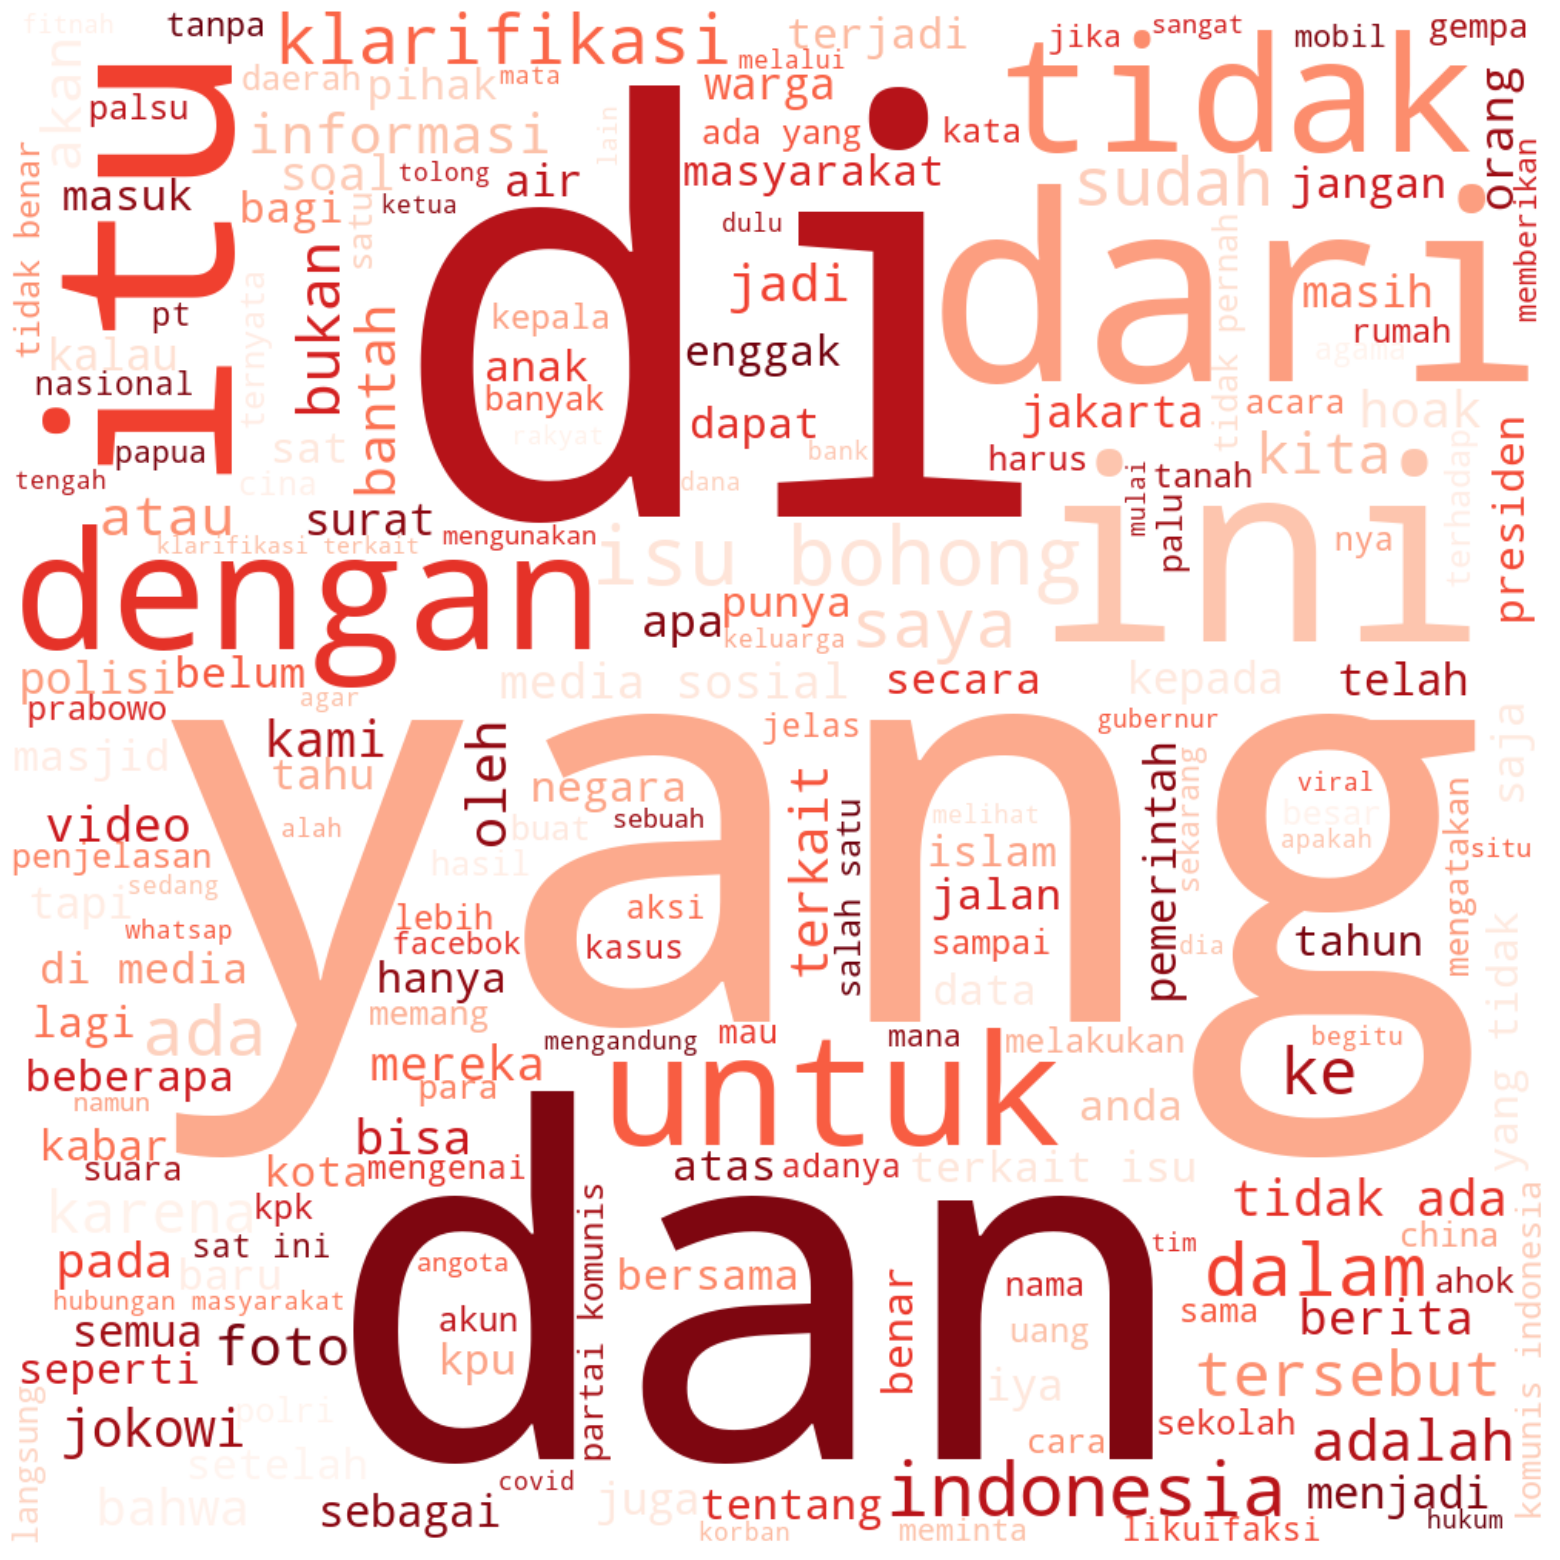

In [5]:
trains1=df[df['label']==0]
all_text=' '.join(word for word in trains1['narasi'])
word_cloud=WordCloud(colormap='Reds', width=1000, height=1000,mode='RGBA',background_color='white').generate(all_text)
plt.figure(figsize=(20,20))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

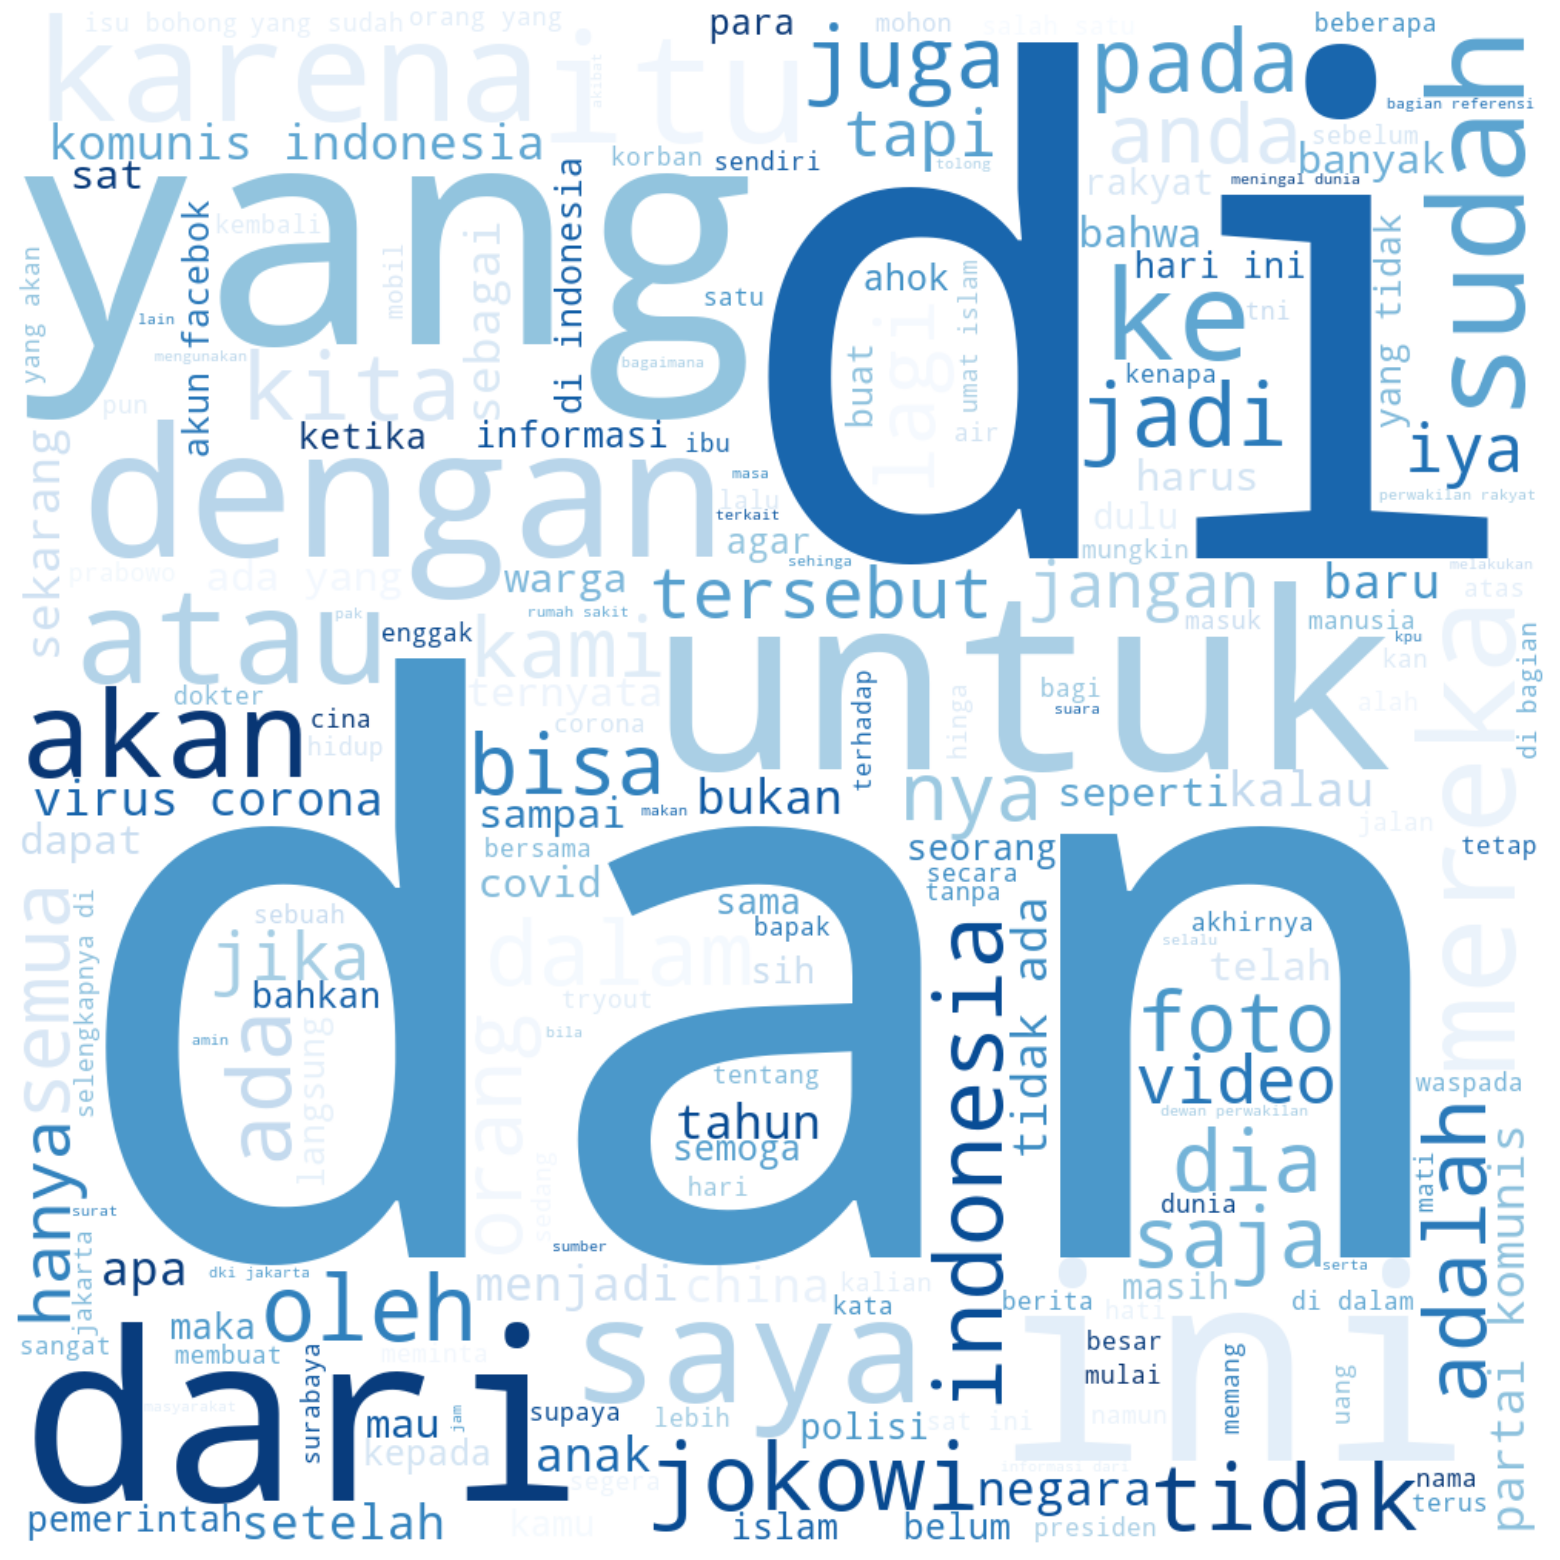

In [6]:
trains1=df[df['label']==1]
all_text=' '.join(word for word in trains1['narasi'])
word_cloud=WordCloud(colormap='Blues', width=1000, height=1000,mode='RGBA',background_color='white').generate(all_text)
plt.figure(figsize=(20,20))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

In [7]:
import string, re

def cleansing(df):
    #lowertext
    df=df.lower()
    
    #Remove Punctuation
    remove=string.punctuation
    translator=str.maketrans(remove,' '*len(remove))
    df=df.translate(translator)
    
    #Remove ASCII & UNICODE
    df=df.encode('ascii','ignore').decode('utf-8')
    df=re.sub(r'[^\x00-\x7f]',r'', df)
    
    #Remove Newline
    df=df.replace('\n',' ')
    
    return df

In [8]:
review = []
for index, row  in df.iterrows():
    review.append(cleansing(row['judul']))

In [9]:
review

['pemakaian masker menyebabkan penyakit legionaires',
 'instruksi gubernur jateng tentang penilangan bagi yang tidak bermasker di muka umum rp mengunakan etilang via apa pikobar',
 'foto jim rohn jokowi adalah presiden terbaik dalam sejarah bangsa indonesia',
 'ini bukan politik tapi kenyatan pak jokowi berhasil memulangkan triliun uang negara dari swis',
 'foto kadrun jika lihat foto ini panas dingin',
 'event promo smartphone jne spesial di bulan juni',
 'mereka sudah mempersiapkan diri dengan baik untuk menguasai negeri ini',
 'foto presiden italia menangis karena tidak cukup lahan untuk mengubur an korban corona per hari',
 'kapolres timor tengah utara nusa tengara timur beri klarifikasi terkait video polisi diamkan korban kecelakan',
 'video polisi china telah menganiaya wanita uighur lehernya di cekik pakai kaki',
 'akhirnya jokowi bersedia mengundurkan diri',
 'informasi jalur rawan begal dan himbauan untuk tidak keluar malam oleh kapolres cianjur',
 'dirut pt agung podomoro lan

Data preparation

In [10]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
 
# Contoh
sentence = 'foto presiden italia menangis karena tidak cukup lahan untuk mengubur an korban corona per hari'
stop = stopword.remove(sentence)
print(stop)

foto presiden italia menangis lahan mengubur an korban corona


In [11]:
review = []
for index, row in df.iterrows():
    review.append(stopword.remove(row['narasi']))


df['narasi']=review
df

,narasi,judul,label
0,caler tryout radio talk show recently shared t...,pemakaian masker menyebabkan penyakit legionaires,1
1,ythseluruh angota grup sesuai instruksi gubern...,instruksi gubernur jateng tentang penilangan b...,1
2,jokowi presiden terbaik sejarah bangsa indones...,foto jim rohn jokowi adalah presiden terbaik d...,1
3,maf mas mbak politik kenyatan jokowi berhasil ...,ini bukan politik tapi kenyatan pak jokowi ber...,1
4,kadrun foto panas dingin,foto kadrun jika lihat foto ini panas dingin,1
...,...,...,...
9655,foto raja salman mengangkat tandu jenazah korb...,foto raja salman mengangkat tandu jenazah korb...,1
9656,jokowi dituduh bodoh salah bersalaman raja saudi,jokowi dituduh bodoh salah cara dalam bersalam...,1
9657,jokowi dituduh memasukan ribuan tenaga asing i...,jokowi dituduh memasukan ribuan tenaga kerja a...,1
9658,uang rupiah terpuruk,mata uang rupiah terpuruk,1


Train test split

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# vectorizer = CountVectorizer()  

X_train, X_test, y_train, y_test = train_test_split(df['narasi'], df['label'], \
                                                    test_size=0.2, random_state=0)

print('Load %d training examples and %d validation examples. \n' %(X_train.shape[0],X_test.shape[0]))
print('Show a review in the training set : \n', X_train.iloc[10])
X_train,y_train

# X_train = vectorizer.fit_transform(X_train)
# X_test = vectorizer.transform(X_test)

Load 7728 training examples and 1932 validation examples. 

Show a review in the training set : 
 laporan kebakaran mobil


(8329                                   pembunuhan muadzin
 6608    peaceful days shanghai bagaswisnuaji want tryo...
 159     maskapai penebangan turki melarikan tabrakan d...
 460     bank muamalat dicaplok lipo asalamu alaikum me...
 5135    pemberitahuan giant pal manager meningal covid...
                               ...                        
 7891    indonesia ku sayang indonesia ku malang sadarl...
 9225    fpi bubarkan pengobatan gratis dp pdi perjuang...
 4859              kecelakan maut air terjun uluk til belu
 3264                 diarab pengumuman hilang mengenalnya
 2732                  psb kota bandung raya senin jam wib
 Name: narasi, Length: 7728, dtype: object,
 8329    1
 6608    1
 159     1
 460     1
 5135    1
        ..
 7891    1
 9225    1
 4859    1
 3264    1
 2732    1
 Name: label, Length: 7728, dtype: int64)

Text preprocessing

In [13]:
# from teams.models import *
# from bs4 import BeautifulSoup
# from django.conf import settings
import requests, os, string

def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False, \
             ):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'html.parser').get_text()
    letters_only = re.sub("[^a-zA-Z]", " ", text)
    words = letters_only.lower().split() 
    
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    if stemming==True:

        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text==True:
        return (words)
    
    return( " ".join(words))

LSTM Model

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix

train_df, test_df = train_test_split(df, test_size = 0.2, random_state = 42)
print("Training data size : ", train_df.shape)
print("Test data size : ", test_df.shape)

Training data size :  (7728, 3)
Test data size :  (1932, 3)


In [16]:
top_words = 50000
# max_sequence_length = 250
# embedding = 100

tokenizer = Tokenizer(num_words=top_words, lower=True)   
tokenizer.fit_on_texts(train_df['narasi'])
list_tokenized_train = tokenizer.texts_to_sequences(train_df['narasi'])
# word_index = tokenizer.word_index
# print('founf %s unique tokens.' & len[word_index])

max_sequence_length = 250
X_train = pad_sequences(list_tokenized_train, maxlen=max_sequence_length)
y_train = train_df['label']

In [17]:
import pickle
with open('tokenizer.pickle', 'wb') as f:
    pickle.dump(tokenizer, f)

In [18]:
tf.random.set_seed(1234)
embedding_vecor_length = 32
model_baseline = Sequential()
model_baseline.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_sequence_length))
model_baseline.add(LSTM(100))
model_baseline.add(Dense(1, activation='sigmoid'))
model_baseline.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_baseline.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 32)           1600032   
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 1,653,333
Trainable params: 1,653,333
Non-trainable params: 0
_________________________________________________________________


In [19]:
history_baseline = model_baseline.fit(X_train,y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
49/49 [==============================] - 28s 469ms/step - loss: 0.4872 - accuracy: 0.8340 - val_loss: 0.4073 - val_accuracy: 0.8571
Epoch 2/10
49/49 [==============================] - 22s 451ms/step - loss: 0.3967 - accuracy: 0.8450 - val_loss: 0.3463 - val_accuracy: 0.8648
Epoch 3/10
49/49 [==============================] - 22s 454ms/step - loss: 0.2419 - accuracy: 0.9008 - val_loss: 0.3373 - val_accuracy: 0.8803
Epoch 4/10
49/49 [==============================] - 26s 532ms/step - loss: 0.1232 - accuracy: 0.9544 - val_loss: 0.3831 - val_accuracy: 0.8693
Epoch 5/10
49/49 [==============================] - 32s 657ms/step - loss: 0.0699 - accuracy: 0.9757 - val_loss: 0.4311 - val_accuracy: 0.8674
Epoch 6/10
49/49 [==============================] - 35s 709ms/step - loss: 0.0464 - accuracy: 0.9843 - val_loss: 0.5124 - val_accuracy: 0.8855
Epoch 7/10
49/49 [==============================] - 35s 707ms/step - loss: 0.0345 - accuracy: 0.9884 - val_loss: 0.5366 - val_accuracy: 0.8668

In [21]:
tf.random.set_seed(1234)
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_sequence_length))
model.add(LSTM(100))
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.02)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 250, 32)           1600032   
                                                                 
 lstm_1 (LSTM)               (None, 100)               53200     
                                                                 
 dense_1 (Dense)             (None, 40)                4040      
                                                                 
 dense_2 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1,657,313
Trainable params: 1,657,313
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(X_train,y_train, epochs=8, batch_size=128, validation_split=0.2)

Epoch 1/8
49/49 [==============================] - 24s 428ms/step - loss: 0.4586 - accuracy: 0.8416 - val_loss: 0.4130 - val_accuracy: 0.8558
Epoch 2/8
49/49 [==============================] - 21s 424ms/step - loss: 0.2661 - accuracy: 0.8999 - val_loss: 0.4121 - val_accuracy: 0.8331
Epoch 3/8
49/49 [==============================] - 21s 427ms/step - loss: 0.1122 - accuracy: 0.9588 - val_loss: 0.4644 - val_accuracy: 0.8279
Epoch 4/8
49/49 [==============================] - 28s 564ms/step - loss: 0.0511 - accuracy: 0.9817 - val_loss: 0.5435 - val_accuracy: 0.8622
Epoch 5/8
49/49 [==============================] - 23s 464ms/step - loss: 0.0288 - accuracy: 0.9893 - val_loss: 0.6205 - val_accuracy: 0.8338
Epoch 6/8
49/49 [==============================] - 22s 446ms/step - loss: 0.0202 - accuracy: 0.9905 - val_loss: 0.7787 - val_accuracy: 0.8545
Epoch 7/8
49/49 [==============================] - 21s 433ms/step - loss: 0.0132 - accuracy: 0.9935 - val_loss: 0.9463 - val_accuracy: 0.8648
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


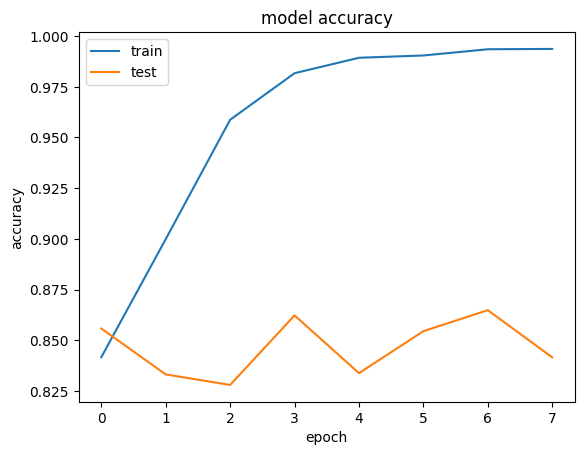

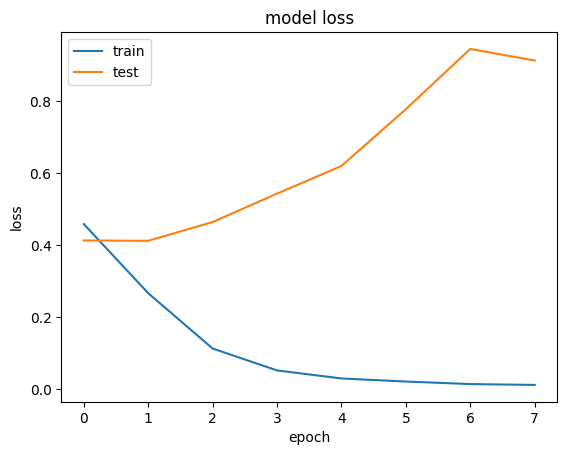

In [23]:
import matplotlib.pyplot as plt

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
print(history_baseline.history_baseline.keys())
# summarize history_baseline for accuracy
plt.plot(history_baseline.history_baseline['accuracy'])
plt.plot(history_baseline.history_baseline['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history_baseline for loss
plt.plot(history_baseline.history_baseline['loss'])
plt.plot(history_baseline.history_baseline['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

AttributeError: 'History' object has no attribute 'history_baseline'

In [ ]:
list_tokenized_test = tokenizer.texts_to_sequences(test_df['narasi'])
X_test = pad_sequences(list_tokenized_test, maxlen=max_sequence_length)
y_test = test_df['label']
prediction = model.predict(X_test)
y_pred = (prediction > 0.5)
print("Accuracy of the model : ", accuracy_score(y_pred, y_test))
print('F1-score: ', f1_score(y_pred, y_test))
print('Confusion matrix:')
confusion_matrix(y_test,y_pred)

61/61 [==============================] - 4s 47ms/step
Accuracy of the model :  0.8576604554865425
F1-score:  0.9188551195042785
Confusion matrix:


array([[ 100,  191],
       [  84, 1557]], dtype=int64)

Pengujian

In [ ]:
model.save('LSTM.h5')

In [ ]:
model_baseline.save('LSTM_baseline.h5')

In [ ]:
from keras.models import load_model

sentences = ['maskapai penebangan turki melarikan diri',]

# load model from single file
model = load_model('LSTM.h5')

tokenized_test = tokenizer.texts_to_sequences(sentences)
# X_test = pad_sequences(tokenized_test, maxlen=max_review_length)
X_test = pad_sequences(tokenized_test, maxlen=max_sequence_length)

prediction = model.predict(X_test)
print(prediction)
pred_labels = []
for i in prediction:
    if i > 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
        
for i in range(len(sentences)):
    print(sentences[i])
    if pred_labels[i] == 1:
        s = 'Tidak Hoax'
    else:
        s = 'Berita Hoax'
    print("Prediksi sentiment : ",s)

1/1 [==============================] - 1s 788ms/step
[[0.99990433]]
maskapai penebangan turki melarikan diri
Prediksi sentiment :  Tidak Hoax
